In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras import  layers
import keras
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
#load data
#4000 米 的
path = 'D:\ML_data_sql\\2022数模美赛选拔赛\\all'
data5 = pd.read_excel(os.path.join(path,'all18.xlsx'),engine='openpyxl')
df2= data5.drop(data5.columns[[9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,-2,-1]], axis=1)
df2 = df2.fillna(df2.mean())
# print(np.any(df2.isnull())) 
df2_index = pd.period_range('1991-01',periods=df2.shape[0],freq='M')
df2 = df2.drop(df2.columns[[0,4,5]],axis=1)
df2.index = df2_index
# #数据处理结束
df2.head()

,海拔高度(m),经度,纬度,平均气温(℃),平均最高气温(℃),平均最低气温(℃),平均气温≤0℃的天数,平均风速(knots),平均最大持续风速(knots),单日最大平均风速(knots)
1991-01,3250,123.366667,-75.116667,-29.35,-24.04,-36.26,26,3.62,5.42,11.1
1991-02,3250,123.366667,-75.116667,-36.94,-30.27,-44.17,21,5.03,5.58,9.9
1991-03,3250,123.366667,-75.116667,-50.67,-44.67,-55.84,22,5.06,6.39,15.9
1991-04,3250,123.366667,-75.116667,-55.71,-52.00,-59.18,23,3.60,5.10,13.0
1991-05,3250,123.366667,-75.116667,-67.32,-64.70,-69.42,31,3.06,4.35,7.0


In [3]:
#归一化处理
from sklearn.preprocessing import MinMaxScaler

vis = df2['平均气温(℃)'].values


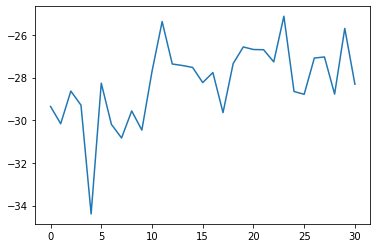

In [4]:
one =[]
for i in range(0,len(vis),12):
    one.append(vis[i])

means =(np.sum(one)-one[5])/(len(one)-1)
one[5] = means
plt.plot(one)
plt.savefig('all18_jan_all.png')
plt.show()


In [5]:
vis = vis.reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(vis)
# print(scaled_data)
scaled_data_series = scaled_data.reshape(-1,1)
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix][-1]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [6]:
scaled_data_series.shape

(371, 1)

In [7]:
raw_seq = scaled_data_series

# choose a number of time steps
#设置步长
n_steps = 12

# split into samples
X, y = split_sequence(raw_seq, n_steps)


In [8]:
print(X.shape,y.shape)

(359, 12, 1) (359,)


In [9]:

train_data = X[:-24]
test_data = X[-24:]

train_y = y[:-24]
test_y = y[-24:]

y1 = np.arange(1,train_data.shape[0]+1) 
y2 = np.arange(train_data.shape[0],train_data.shape[0]+test_data.shape[0])

# plt.plot(y1, train_data, 'r', y2, test_data, 'b')
# plt.show()

In [10]:
train_data.shape

(335, 12, 1)

Epoch 1/100
168/168 - 0s - loss: 0.0887
Epoch 2/100
168/168 - 0s - loss: 0.0188
Epoch 3/100
168/168 - 0s - loss: 0.0113
Epoch 4/100
168/168 - 0s - loss: 0.0125
Epoch 5/100
168/168 - 0s - loss: 0.0095
Epoch 6/100
168/168 - 0s - loss: 0.0109
Epoch 7/100
168/168 - 0s - loss: 0.0104
Epoch 8/100
168/168 - 0s - loss: 0.0097
Epoch 9/100
168/168 - 0s - loss: 0.0096
Epoch 10/100
168/168 - 0s - loss: 0.0113
Epoch 11/100
168/168 - 0s - loss: 0.0083
Epoch 12/100
168/168 - 0s - loss: 0.0079
Epoch 13/100
168/168 - 0s - loss: 0.0084
Epoch 14/100
168/168 - 0s - loss: 0.0080
Epoch 15/100
168/168 - 0s - loss: 0.0089
Epoch 16/100
168/168 - 0s - loss: 0.0082
Epoch 17/100
168/168 - 0s - loss: 0.0077
Epoch 18/100
168/168 - 1s - loss: 0.0093
Epoch 19/100
168/168 - 0s - loss: 0.0078
Epoch 20/100
168/168 - 0s - loss: 0.0084
Epoch 21/100
168/168 - 0s - loss: 0.0078
Epoch 22/100
168/168 - 0s - loss: 0.0079
Epoch 23/100
168/168 - 0s - loss: 0.0080
Epoch 24/100
168/168 - 1s - loss: 0.0078
Epoch 25/100
168/168 - 0s

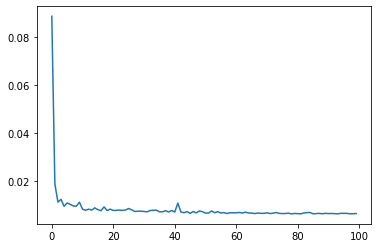

In [11]:
n_features = 1
train_data = train_data.reshape(train_data.shape[0], train_data.shape[1], n_features)
test_data = test_data.reshape(test_data.shape[0], test_data.shape[1], n_features)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

history = model.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)
plt.plot(history.history['loss'])
plt.savefig('loss')
plt.show()

In [12]:
predictions = model.predict(test_data, verbose=2)
train_pre = model.predict(train_data,verbose=2)
predictions = predictions.reshape(predictions.shape[0])
print(predictions.shape, test_y.shape)

1/1 - 0s
11/11 - 0s
(24,) (24,)


In [13]:
show_data = np.hstack((train_y,test_y))
print(len(show_data))
print(train_pre.shape,predictions.shape)
train_pre = train_pre.squeeze()
pre_data = np.hstack((train_pre,predictions))
print(pre_data.shape)

359
(335, 1) (24,)
(359,)


In [14]:
pre_18 = pre_data
pre_18.shape,predictions.shape

((359,), (24,))

In [15]:
# predict = np.hstack((pre_18, predictions))
# predict.shape
predict = pre_18.reshape(-1,1)
pre_train,_ =split_sequence(predict,12)
pre_2022 = model.predict(pre_train,verbose=2)

11/11 - 0s


In [16]:
pre_2022 = pre_2022.reshape(-1,1)
pre_train,_ =split_sequence(pre_2022,12)
pre_2023 = model.predict(pre_train,verbose=2)

11/11 - 0s


In [17]:
pre_2023 = pre_2023.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023,12)
pre_2024 = model.predict(pre_train,verbose=2)

11/11 - 0s


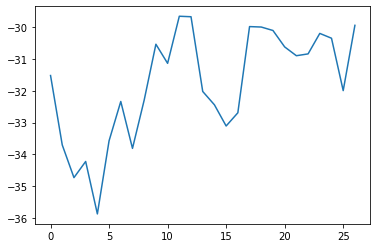

[array([-31.520607], dtype=float32),
 array([-33.70463], dtype=float32),
 array([-34.732822], dtype=float32),
 array([-34.225044], dtype=float32),
 array([-35.87511], dtype=float32),
 array([-33.57366], dtype=float32),
 array([-32.33714], dtype=float32),
 array([-33.81316], dtype=float32),
 array([-32.29188], dtype=float32),
 array([-30.536203], dtype=float32),
 array([-31.137192], dtype=float32),
 array([-29.65534], dtype=float32),
 array([-29.670902], dtype=float32),
 array([-32.02234], dtype=float32),
 array([-32.442455], dtype=float32),
 array([-33.108627], dtype=float32),
 array([-32.693024], dtype=float32),
 array([-29.980852], dtype=float32),
 array([-29.994871], dtype=float32),
 array([-30.103561], dtype=float32),
 array([-30.620228], dtype=float32),
 array([-30.89731], dtype=float32),
 array([-30.840073], dtype=float32),
 array([-30.195522], dtype=float32),
 array([-30.346859], dtype=float32),
 array([-31.995445], dtype=float32),
 array([-29.941166], dtype=float32)]

In [18]:
pre_2024_real = scaler.inverse_transform(pre_2024)
aaa = []
for i in range(0,len(pre_2024_real),12):
    aaa.append(pre_2024_real[i])

plt.plot(aaa)
plt.show()
aaa

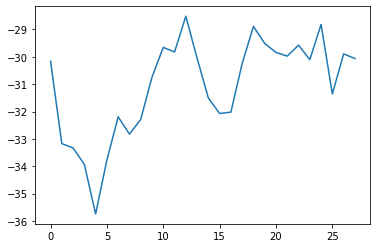

[array([-30.158392], dtype=float32),
 array([-33.17394], dtype=float32),
 array([-33.3331], dtype=float32),
 array([-33.936012], dtype=float32),
 array([-35.74544], dtype=float32),
 array([-33.772366], dtype=float32),
 array([-32.19582], dtype=float32),
 array([-32.827435], dtype=float32),
 array([-32.29044], dtype=float32),
 array([-30.743963], dtype=float32),
 array([-29.653948], dtype=float32),
 array([-29.823845], dtype=float32),
 array([-28.515795], dtype=float32),
 array([-30.050253], dtype=float32),
 array([-31.506573], dtype=float32),
 array([-32.072556], dtype=float32),
 array([-32.022358], dtype=float32),
 array([-30.244474], dtype=float32),
 array([-28.887169], dtype=float32),
 array([-29.512787], dtype=float32),
 array([-29.838615], dtype=float32),
 array([-29.974224], dtype=float32),
 array([-29.572699], dtype=float32),
 array([-30.102253], dtype=float32),
 array([-28.815918], dtype=float32),
 array([-31.358978], dtype=float32),
 array([-29.892138], dtype=float32),
 array(

In [19]:
pre_2023_real = scaler.inverse_transform(pre_2023)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real),12):
    aaa.append(pre_2023_real[i])

plt.plot(aaa)
plt.show()
aaa

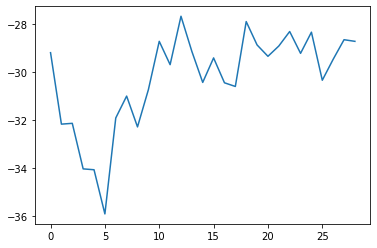

[array([-29.180347], dtype=float32),
 array([-32.165302], dtype=float32),
 array([-32.1318], dtype=float32),
 array([-34.034294], dtype=float32),
 array([-34.070404], dtype=float32),
 array([-35.9153], dtype=float32),
 array([-31.907204], dtype=float32),
 array([-30.994171], dtype=float32),
 array([-32.28108], dtype=float32),
 array([-30.727259], dtype=float32),
 array([-28.706696], dtype=float32),
 array([-29.681435], dtype=float32),
 array([-27.659018], dtype=float32),
 array([-29.127096], dtype=float32),
 array([-30.422823], dtype=float32),
 array([-29.399473], dtype=float32),
 array([-30.438107], dtype=float32),
 array([-30.5922], dtype=float32),
 array([-27.881771], dtype=float32),
 array([-28.857716], dtype=float32),
 array([-29.332132], dtype=float32),
 array([-28.90248], dtype=float32),
 array([-28.29714], dtype=float32),
 array([-29.20839], dtype=float32),
 array([-28.324299], dtype=float32),
 array([-30.33215], dtype=float32),
 array([-29.456823], dtype=float32),
 array([-28.

In [30]:
pre_2022_real = scaler.inverse_transform(pre_2022)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_real),12):
    aaa.append(pre_2022_real[i])

plt.plot(aaa)
plt.show()
aaa


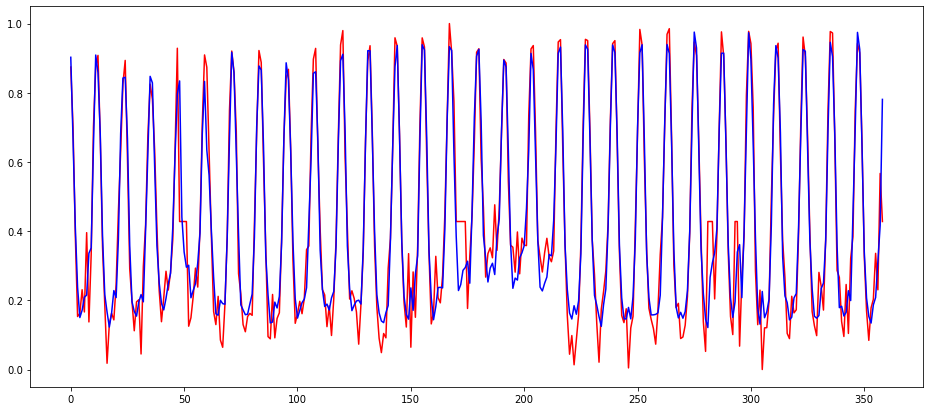

In [31]:
fig = plt.figure(figsize=(16, 7))
plt.plot(range(len(show_data)), show_data,'r',range(len(show_data)),pre_data,'b')
plt.savefig('all18.png')
plt.show()

In [22]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (train_data.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [23]:
history2 = regressor.fit(train_data, train_y, epochs=100, batch_size=2, verbose=2)

Epoch 1/100
168/168 - 2s - loss: 0.0934
Epoch 2/100
168/168 - 2s - loss: 0.0476
Epoch 3/100
168/168 - 2s - loss: 0.0229
Epoch 4/100
168/168 - 2s - loss: 0.0173
Epoch 5/100
168/168 - 2s - loss: 0.0188
Epoch 6/100
168/168 - 2s - loss: 0.0169
Epoch 7/100
168/168 - 2s - loss: 0.0184
Epoch 8/100
168/168 - 2s - loss: 0.0166
Epoch 9/100
168/168 - 2s - loss: 0.0154
Epoch 10/100
168/168 - 2s - loss: 0.0142
Epoch 11/100
168/168 - 2s - loss: 0.0139
Epoch 12/100
168/168 - 2s - loss: 0.0125
Epoch 13/100
168/168 - 2s - loss: 0.0131
Epoch 14/100
168/168 - 2s - loss: 0.0123
Epoch 15/100
168/168 - 2s - loss: 0.0122
Epoch 16/100
168/168 - 2s - loss: 0.0137
Epoch 17/100
168/168 - 2s - loss: 0.0133
Epoch 18/100
168/168 - 2s - loss: 0.0123
Epoch 19/100
168/168 - 2s - loss: 0.0111
Epoch 20/100
168/168 - 2s - loss: 0.0121
Epoch 21/100
168/168 - 2s - loss: 0.0127
Epoch 22/100
168/168 - 2s - loss: 0.0134
Epoch 23/100
168/168 - 2s - loss: 0.0116
Epoch 24/100
168/168 - 2s - loss: 0.0126
Epoch 25/100
168/168 - 2s

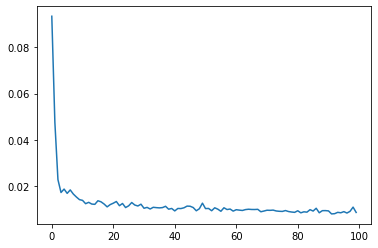

In [24]:
plt.plot(history2.history['loss'])
plt.savefig('loss_big.png')
plt.show()

In [25]:
predictions2 = regressor.predict(test_data, verbose=2)
train_pre2 = regressor.predict(train_data,verbose=2)
predictions2 = predictions2.reshape(predictions.shape[0])
train_pre2 = train_pre2.squeeze()
pre_data2 = np.hstack((train_pre2,predictions2))

1/1 - 0s
11/11 - 0s


In [26]:
predict2 = pre_data2
# predict.shape
predict2 = predict2.reshape(-1,1)
pre_train2,_ =split_sequence(predict2,12)
pre_2022_2= regressor.predict(pre_train2,verbose=2)

11/11 - 0s


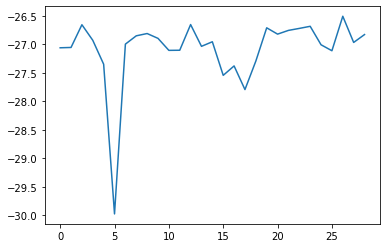

[array([-27.05961], dtype=float32),
 array([-27.053915], dtype=float32),
 array([-26.655266], dtype=float32),
 array([-26.928492], dtype=float32),
 array([-27.347857], dtype=float32),
 array([-29.973465], dtype=float32),
 array([-26.995443], dtype=float32),
 array([-26.849817], dtype=float32),
 array([-26.809744], dtype=float32),
 array([-26.894428], dtype=float32),
 array([-27.10486], dtype=float32),
 array([-27.10272], dtype=float32),
 array([-26.652378], dtype=float32),
 array([-27.034225], dtype=float32),
 array([-26.954044], dtype=float32),
 array([-27.5429], dtype=float32),
 array([-27.377958], dtype=float32),
 array([-27.792458], dtype=float32),
 array([-27.293177], dtype=float32),
 array([-26.709396], dtype=float32),
 array([-26.820175], dtype=float32),
 array([-26.754616], dtype=float32),
 array([-26.71979], dtype=float32),
 array([-26.682865], dtype=float32),
 array([-27.006908], dtype=float32),
 array([-27.111477], dtype=float32),
 array([-26.506453], dtype=float32),
 array(

In [27]:
pre_2022_2_r = scaler.inverse_transform(pre_2022_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2022_2_r),12):
    aaa.append(pre_2022_2_r[i])

plt.plot(aaa)
plt.show()
aaa

11/11 - 0s


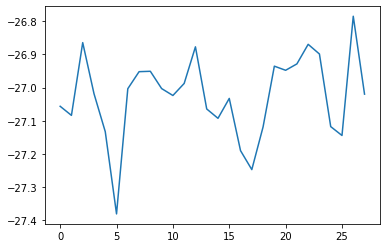

[array([-27.056402], dtype=float32),
 array([-27.083757], dtype=float32),
 array([-26.864521], dtype=float32),
 array([-27.018297], dtype=float32),
 array([-27.132797], dtype=float32),
 array([-27.380684], dtype=float32),
 array([-27.003414], dtype=float32),
 array([-26.952084], dtype=float32),
 array([-26.950907], dtype=float32),
 array([-27.003023], dtype=float32),
 array([-27.02385], dtype=float32),
 array([-26.987587], dtype=float32),
 array([-26.877222], dtype=float32),
 array([-27.06442], dtype=float32),
 array([-27.092611], dtype=float32),
 array([-27.032677], dtype=float32),
 array([-27.190033], dtype=float32),
 array([-27.247168], dtype=float32),
 array([-27.11851], dtype=float32),
 array([-26.935497], dtype=float32),
 array([-26.947895], dtype=float32),
 array([-26.928682], dtype=float32),
 array([-26.869658], dtype=float32),
 array([-26.898888], dtype=float32),
 array([-27.117594], dtype=float32),
 array([-27.144386], dtype=float32),
 array([-26.785065], dtype=float32),
 arr

In [28]:
pre_2023_2 = pre_2022_2.reshape(-1,1)
pre_train,_ =split_sequence(pre_2023_2,12)
pre_2023_2 = regressor.predict(pre_train,verbose=2)
pre_2023_real_2 = scaler.inverse_transform(pre_2023_2)
# print(pre_2022_real)
# plt.plot(pre_2022_real)
# plt.show()
aaa = []
for i in range(0,len(pre_2023_real_2),12):
    aaa.append(pre_2023_real_2[i])

plt.plot(aaa)
plt.show()
aaa